# Step 1:
## Import Basix Scikit Learn Libraries for Data Manipulation as well Data Visualization.

In [29]:
# Importing Data Manipulation Libraries
import numpy as np
import pandas as pd

# Importing Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Warining Libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Data Logging Libraries
import logging
logging.basicConfig(filename='app.log',
                    level=logging.INFO,
                    filemode= "w",
                    format= "%(asctime)s - %(levelname)s - %(message)s",
                    force= True
                    )

# Step 2 :
## Data Uploading Using Pandas Function

In [30]:
url = "https://raw.githubusercontent.com/Digraskarpratik/Crop_Recommendation_Model/refs/heads/main/Crop_recommendation.csv"

df = pd.read_csv(url)
df.sample(frac=1)

,N,P,K,temperature,humidity,ph,rainfall,label
1173,9,38,25,34.585615,50.340353,5.497947,100.306072,mango
1699,31,26,9,11.698946,93.256389,7.566166,103.200599,orange
245,35,64,78,17.928459,14.273280,7.496645,85.373788,chickpea
2023,80,45,42,23.142650,74.997398,7.380396,151.903548,jute
1355,110,28,46,24.291050,88.045413,6.498896,51.260464,watermelon
...,...,...,...,...,...,...,...,...
1076,89,91,55,25.083474,80.261731,6.275572,94.329615,banana
825,18,66,22,25.879903,67.551090,6.347379,47.896452,lentil
1713,56,57,48,31.562138,93.048486,6.506121,63.622508,papaya
1833,8,6,33,28.278043,93.647613,6.095261,171.945796,coconut


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [32]:
logging.info("Initial Data Loaded Successfully")

In [33]:
# Splitting the Data into Numerical and Categorical Data

Numerical_Data = df.select_dtypes(exclude= "object")

Chategorical_Data = df.select_dtypes(include= "object")

In [34]:
# Checking the Numerical data
Numerical_Data

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [35]:
# Checking the Categorical data
Chategorical_Data

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [36]:
# Checking for missing values in the dataset
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [37]:
# Perform Univariate Analysis

from collections import OrderedDict

stats = []

for i in Numerical_Data.columns:
    Numerical_stats = OrderedDict([
        ("feature", i),
        ("mean", df[i].mean()),
        ("median", df[i].median()),
        ("mode", df[i].mode()[0]),
        ("min", df[i].min()),
        ("max", df[i].max()),
        ("range", df[i].max() - df[i].min()),
        ("skewness", df[i].skew()),
        ("kurtosis", df[i].kurtosis()),
        ("standard", df[i].std()),
        ("variance", df[i].var()),
        ("IQR", df[i].quantile(0.75) - df[i].quantile(0.25))
    ])
    
    stats.append(Numerical_stats)
    
df_stats = pd.DataFrame(stats)
#stats_df

df_stats.style.background_gradient( subset= ["mean", "median", "mode", "min", "max", "range", "skewness", "kurtosis", "standard", "variance", "IQR"], cmap="coolwarm")

,feature,mean,median,mode,min,max,range,skewness,kurtosis,standard,variance,IQR
0,N,50.551818,37.000000,22.000000,0.000000,140.000000,140.000000,0.509721,-1.058240,36.917334,1362.889537,63.250000
1,P,53.362727,51.000000,60.000000,5.000000,145.000000,140.000000,1.010773,0.860279,32.985883,1088.068460,40.000000
2,K,48.149091,32.000000,17.000000,5.000000,205.000000,200.000000,2.375167,4.449354,50.647931,2565.212869,29.000000
3,temperature,25.616244,25.598693,8.825675,8.825675,43.675493,34.849818,0.184933,1.232555,5.063749,25.641550,5.792279
4,humidity,71.481779,80.473146,14.258040,14.258040,99.981876,85.723836,-1.091708,0.302134,22.263812,495.677307,29.686818
5,ph,6.469480,6.425045,3.504752,3.504752,9.935091,6.430338,0.283929,1.655581,0.773938,0.598980,0.951950
6,rainfall,103.463655,94.867624,20.211267,20.211267,298.560117,278.348850,0.965756,0.607079,54.958389,3020.424469,59.715822


In [38]:
logging.info("The Above Dataset is Non Normal Distributed..!!")

In [39]:
for i in Chategorical_Data.columns:
    print(f"Feature: {i}")
    print(df[i].value_counts())
    print("-"*40)

Feature: label
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
----------------------------------------


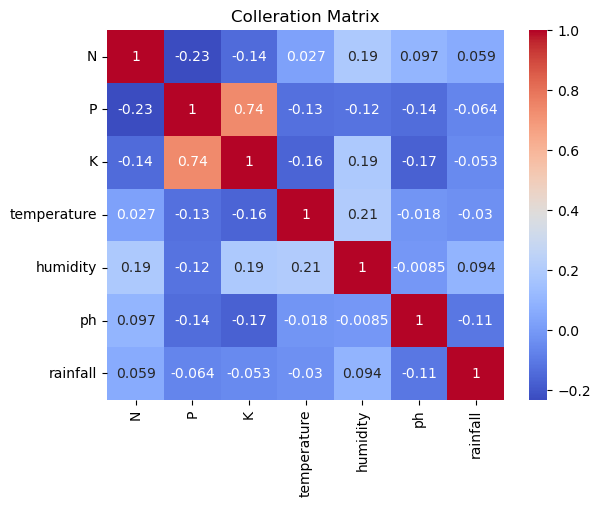

In [40]:
# Checking Correlation Matrix
# x = indepedent variables
# y = dependent variable

sns.heatmap(Numerical_Data.corr(), annot=True,yticklabels= True, cmap= "coolwarm")
plt.title("Colleration Matrix")
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
df["label"] = LabelEncoder().fit_transform(df["label"])

In [42]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [43]:
df.corr()["label"]

N             -0.031130
P             -0.491006
K             -0.346417
temperature    0.113606
humidity       0.193911
ph            -0.012253
rainfall       0.045611
label          1.000000
Name: label, dtype: float64

# Feature Engineering :

In [50]:
df.corr()["label"]

N             -0.031130
P             -0.491006
K             -0.346417
temperature    0.113606
humidity       0.193911
ph            -0.012253
rainfall       0.045611
label          1.000000
Nitrogen       0.028777
Phosphorous    0.339793
Potassium      0.125017
Name: label, dtype: float64

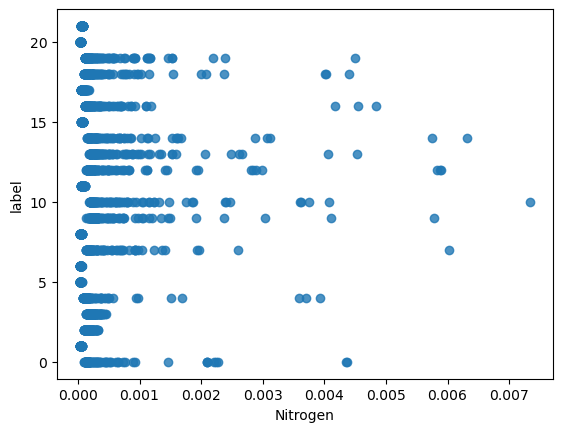

In [51]:
sns.regplot(x = df["Nitrogen"], y = df["label"])
plt.show()

In [53]:
df_stats

,feature,mean,median,mode,min,max,range,skewness,kurtosis,standard,variance,IQR
0,N,50.551818,37.000000,22.000000,0.000000,140.000000,140.000000,0.509721,-1.058240,36.917334,1362.889537,63.250000
1,P,53.362727,51.000000,60.000000,5.000000,145.000000,140.000000,1.010773,0.860279,32.985883,1088.068460,40.000000
2,K,48.149091,32.000000,17.000000,5.000000,205.000000,200.000000,2.375167,4.449354,50.647931,2565.212869,29.000000
3,temperature,25.616244,25.598693,8.825675,8.825675,43.675493,34.849818,0.184933,1.232555,5.063749,25.641550,5.792279
4,humidity,71.481779,80.473146,14.258040,14.258040,99.981876,85.723836,-1.091708,0.302134,22.263812,495.677307,29.686818
5,ph,6.469480,6.425045,3.504752,3.504752,9.935091,6.430338,0.283929,1.655581,0.773938,0.598980,0.951950
6,rainfall,103.463655,94.867624,20.211267,20.211267,298.560117,278.348850,0.965756,0.607079,54.958389,3020.424469,59.715822


In [55]:
'''
# Use Variance Inflation Factor (VIF) to Check for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=["label"])
X = X.assign(constant=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column from the result
vif_data = vif_data[vif_data["feature"]!= "constant"]

# Display the VIF values
print(vif_data)

'''


'\n# Use Variance Inflation Factor (VIF) to Check for Multicollinearity\n\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\nX = df.drop(columns=["label"])\nX = X.assign(constant=1)\n\nvif_data = pd.DataFrame()\nvif_data["feature"] = X.columns\nvif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n\n# Drop the constant column from the result\nvif_data = vif_data[vif_data["feature"]!= "constant"]\n\n# Display the VIF values\nprint(vif_data)\n\n'

# Step 4 :
Splitting the Data into Training set and Testing set Also Using Train and Test Split to Prevent Data Leakage

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["label"] )

y= df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 42)

In [85]:
df['label'].value_counts()

label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [81]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'Nitrogen', 'Phosphorous', 'Potassium'],
      dtype='object')

In [84]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()

DT.fit(X_train, y_train)

y_pred_DT = DT.predict(X_test)

from sklearn.metrics import r2_score

r2_score_DT = r2_score(y_test, y_pred_DT)

print("R2 Score for Decision Tree: ", r2_score_DT)

ValueError: Input X contains infinity or a value too large for dtype('float32').

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

RF = RandomForestClassifier

RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

r2_score_RF = r2_score(y_test, y_pred_RF)

print("R2 Score for Random Forest: ", r2_score_RF)



AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [71]:
# Using Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: Input X contains infinity or a value too large for dtype('float64').